In [375]:
# librerias
import matplotlib.pyplot as plt
import numpy as np

In [376]:
### Ruta
path = "/home/ahr/Desktop/spike_MD/"
# print("x=orig, x1=delta1, x2=delta3, x3=omicron21L, x4=omicron21L")
### crear datasets desde archivos xvg
#orig = x,y = np.loadtxt(path + "orig/atom_rmsf_rbd_Orig.xvg",comments=["@", "#"],unpack=True)
orig = x,y = np.loadtxt(path + "orig/CLUSTER/Cl1_xvg/rmsf_rbd_Orig_0.21m_Cluster0001.xvg",comments=["@", "#"],unpack=True)
#delta1 (ax2)
del1 = x1,y1 = np.loadtxt(path + "delta/inicial/CLUSTER/Cl1_xvg/rmsf_rbd_inicial_0.2m_Cluster0001.xvg",comments=["@", "#"],unpack=True)
#delta3 ((ax3)
del3 = x2,y2 = np.loadtxt(path + "delta/final/CLUSTER/Cl1_xvg/rmsf_rbd_final_0.26m_Cluster0001.xvg",comments=["@", "#"],unpack=True)
#omicron 21K (ax4)
omiK = x3,y3 = np.loadtxt(path + "omicron/CLUSTER/Cl1_xvg/rmsf_rbd_omicron_0.21m_Cluster0001.xvg",comments=["@", "#"],unpack=True)
#omicron 21L (ax5)
omiL = x4,y4 = np.loadtxt(path + "omicron_21L/CLUSTER/Cl1_xvg/rmsf_rbd_omicron21L_0.24m_Cluster0001.xvg",comments=["@", "#"],unpack=True)

#omicron 22B (ax6)
omiB = x5,y5 = np.loadtxt(path + "omicron_22B/CLUSTER/Cl1_xvg/rmsf_rbd_omi22b_0.29m_Cluster0001.xvg",comments=["@", "#"],unpack=True)
#omicron 22E (ax7)
omiE = x6,y6 = np.loadtxt(path + "omicron_22E/CLUSTER/Cl1_xvg/rmsf_rbd_omi22e_0.32m_Cluster0001.xvg",comments=["@", "#"],unpack=True)


In [377]:
## data needed to add markers and annotations [without overlapping mutations in plot]
## some data were removed due that labels overlap on plot, and will be then added manually
adj = 274

## mt positions
Delta21J_1= [452, 478]
Delta21J_1_labs  = [" L452R", " T478K"]
del1_indx = 0

Delta21J_3= [434,452,478]
Delta21J_3_labs  = [" I434V"," L452R", " T478K"]
del3_indx = 0

omicron21K = [339,417,446, 478,484]
omicron21K_labs = [" G339D", " K417N", " G446S", " T478K", " E484A"]
omiK_indx = 0

omicron21L= [339,417,440,478,484]
omicron21L_labs = [" G339D", " K417N", " N440K", " T478K", " E484A"]
omiL_indx = 0

omicron22B= [339,417,440,478,484]
omicron22B_labs = [" G339D", " K417N", " N440K", " T478K", " E484A"]
omiB_indx = 0

omicron22E= [339,417,440,478,484]
omicron22E_labs = [" G339D", " K417N", " N440K", " T478K", " E484A"]
omiE_indx = 0

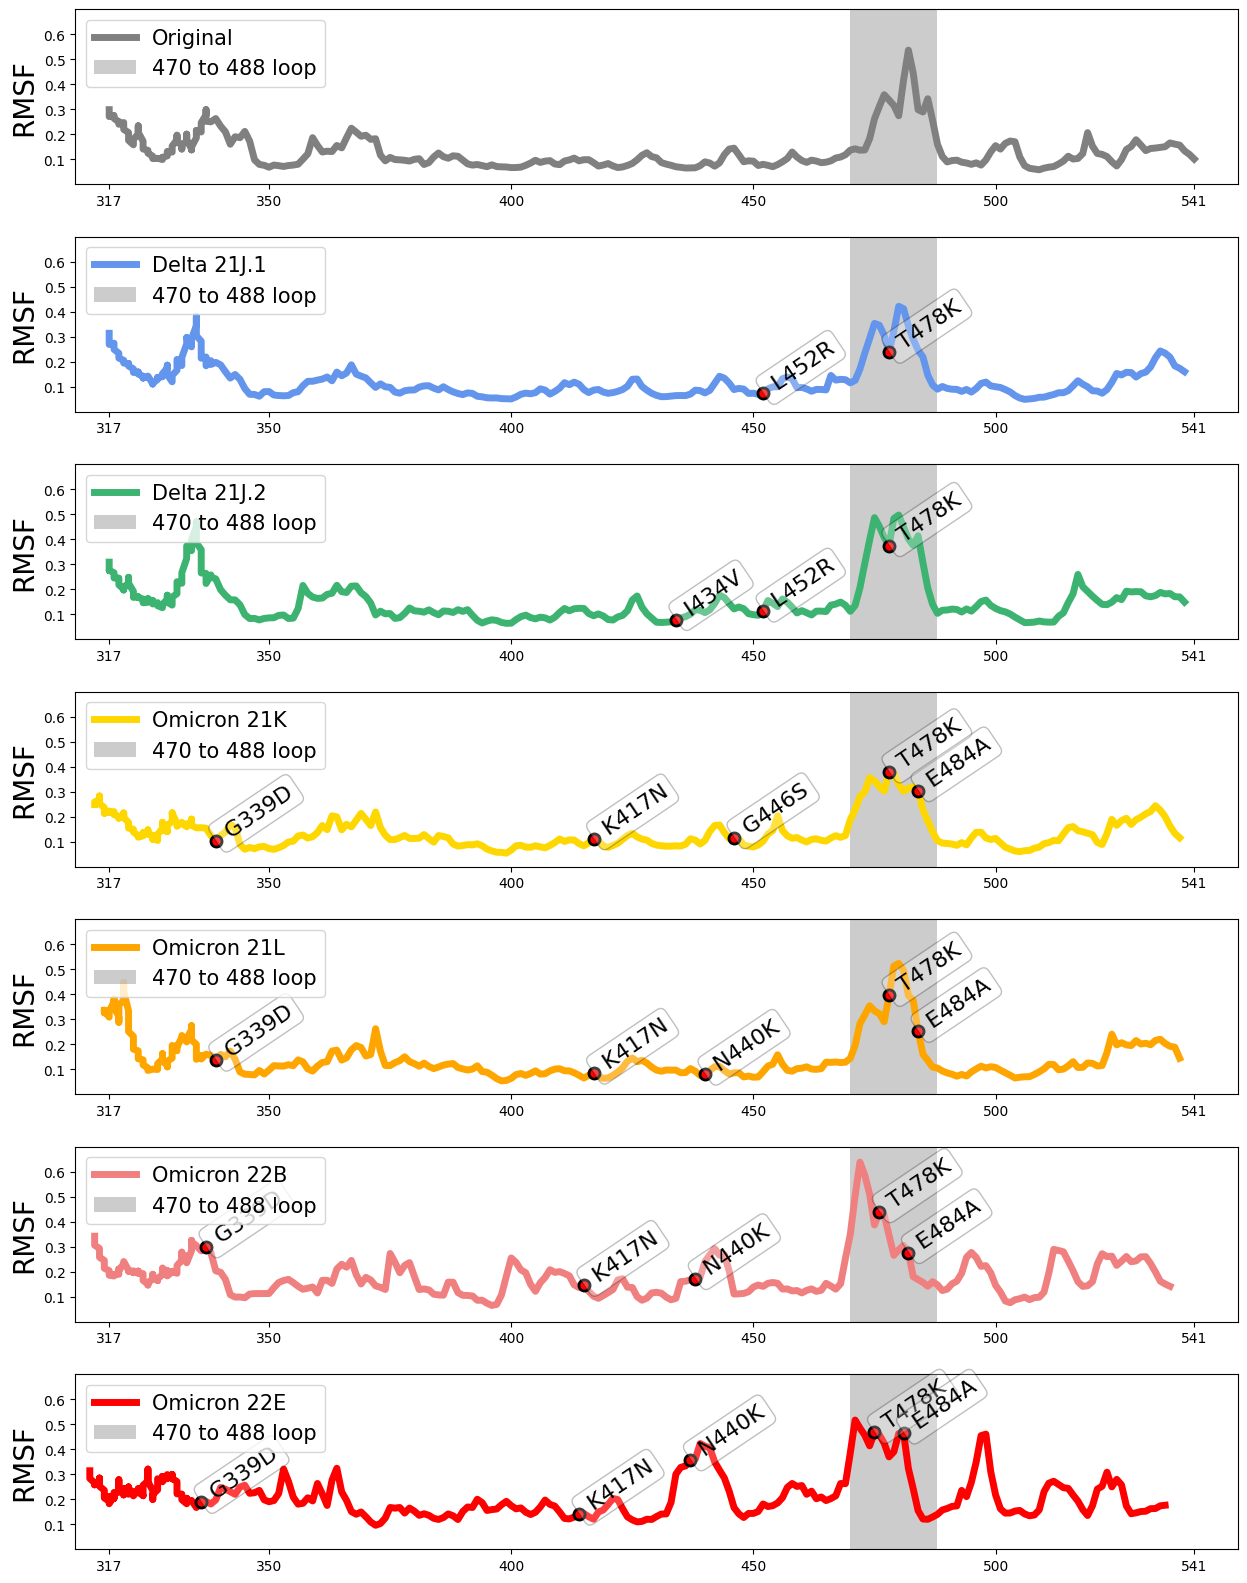

In [378]:
##crear gráfica
fig, axs = plt.subplots(7, 1, figsize=(15, 20), # sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.3
                        , 'wspace': 0})
(ax0, ax1,ax2, ax3,ax4,ax5,ax6) = axs
#fig.suptitle('RMSF calculations in RBD of SARS-CoV-2 variants', fontsize=20) 

## hacer todas las gráficas
## data for make simple graph without annotations
ax = [ax0, ax1,ax2, ax3,ax4,ax5,ax6]
variants = [orig, del1, del3, omiK, omiL,omiB, omiE]
col = ["grey", "cornflowerblue","mediumseagreen", "gold", "orange", "lightcoral", "Red"]
labs = ["Original", "Delta 21J.1", "Delta 21J.2", "Omicron 21K", "Omicron 21L", "Omicron 22B", "Omicron 22E"]

## plot everything
for k, v, c, l in zip(ax, variants, col, labs):
    k.plot(v[0], v[1], color=c, linewidth=5, label=l) 
    k.set_ylabel('RMSF', fontsize=20)
    k.legend(loc='upper left')
    k.axvspan(470, 488, facecolor='gray', alpha=0.4, zorder=0.1, label='470 to 488 loop')
    k.legend(loc="upper left",fontsize=15)
    k.set_ylim([0,0.7])
    k.set_xlim([310,550])
    k.set_xticks([317, 350, 400, 450, 500, 541], fontsize=0)
    k.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], fontsize=0)
    # k.axvline(417)

## plot markers and annotations
variant_markers = [Delta21J_1, Delta21J_3, omicron21K, omicron21L, omicron22B, omicron22E]
variant_markers_labels = [Delta21J_1_labs, Delta21J_3_labs, omicron21K_labs, omicron21L_labs,  omicron22B_labs,  omicron22E_labs]
idx = 0
a = 0
b = 0
axv = [ax1, ax2, ax3, ax4,ax5,ax6]
variants2 = [del1, del3, omiK, omiL, omiB, omiE]
for m, n, var, labs in zip(axv, variants2, variant_markers, variant_markers_labels):
    if m == ax3:
        adj = 272
    elif m == ax4:
        adj = 274 
    for p, j in zip(var, labs):
        m.plot(n[0][p-adj], n[1][p-adj], marker="o", markersize=8, markerfacecolor="red", markeredgecolor= 'black', markeredgewidth=2, zorder=2)
        m.text((n[0][p-adj] - a), (n[1][p-adj] + b), j,  size=16, rotation=34., #weight='bold',
        bbox=dict(boxstyle='round',
        facecolor='w', edgecolor='k', alpha=0.25,
        zorder=1))

### some mt are missing, but will be added manually due overlapping:

# manually fixing overlaping labels:

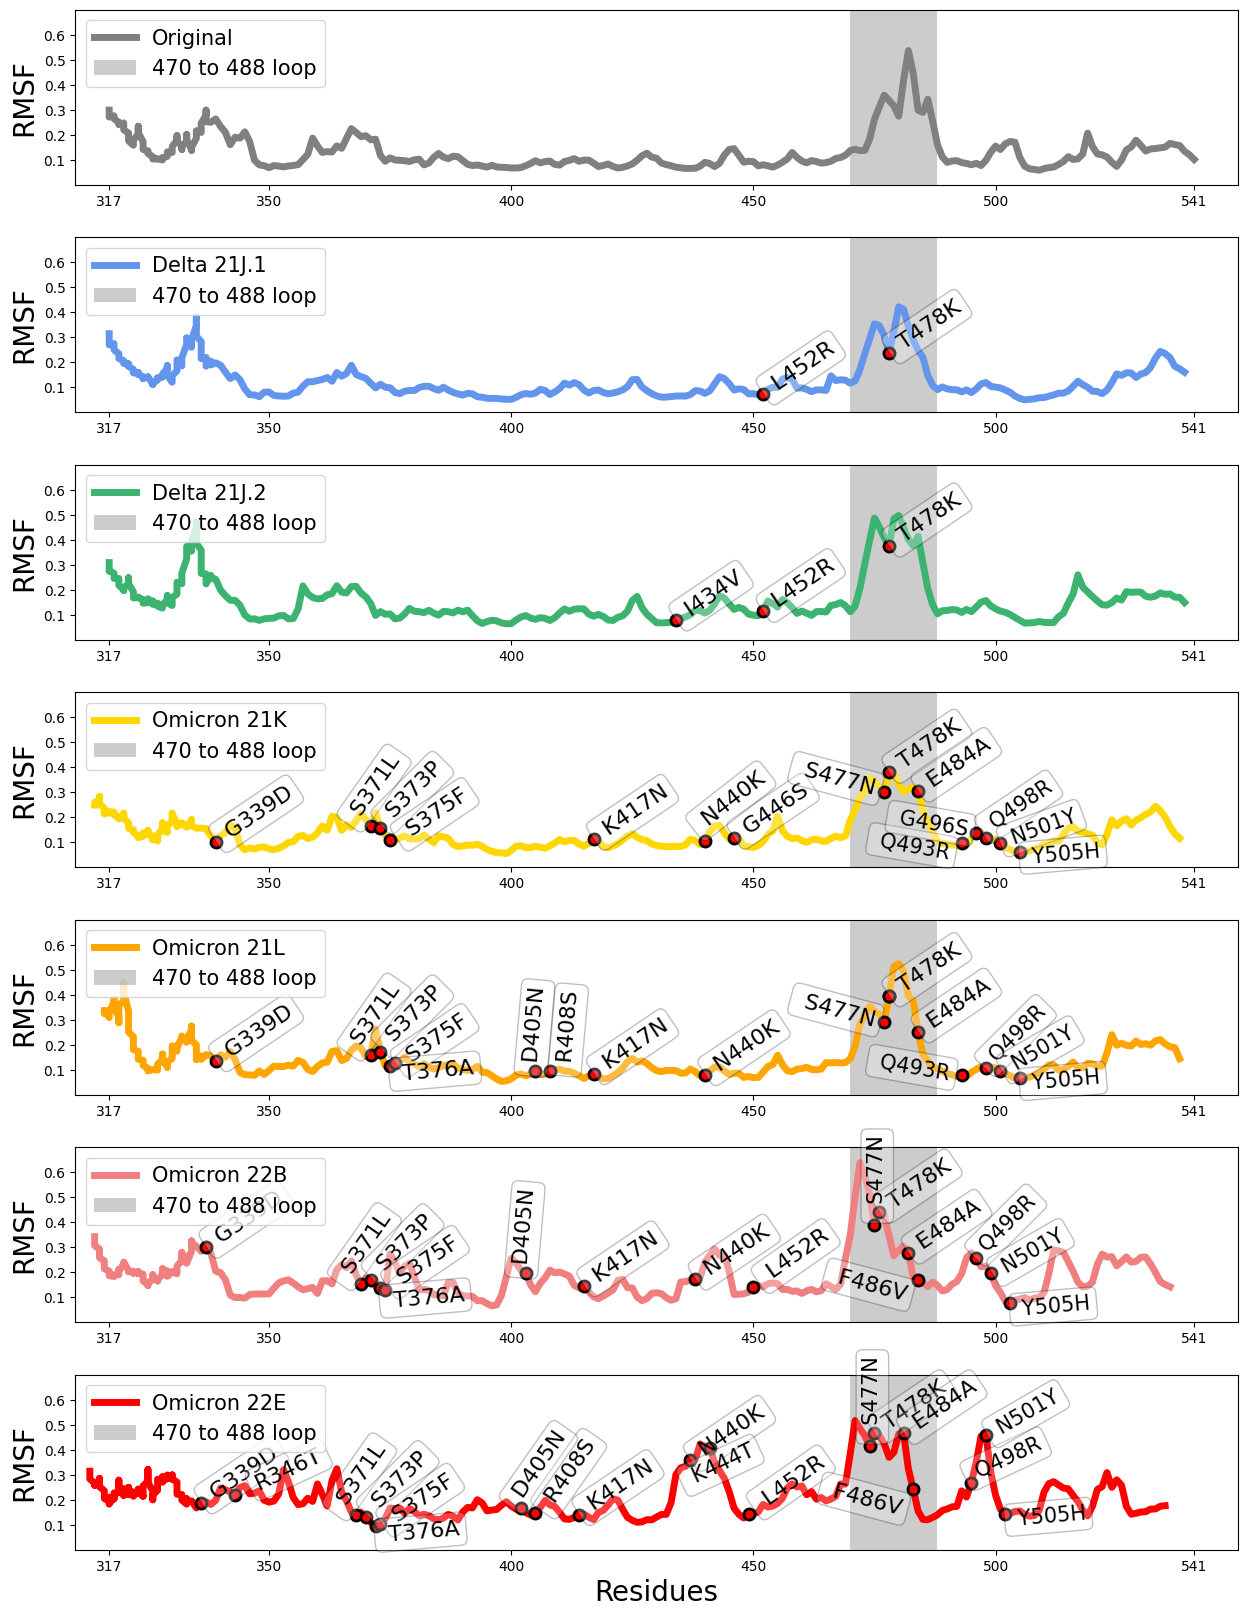

In [379]:
# manually fixing overlaping labels:
mt_mis_point = [371,373,375,440,477,493,496,498,501,505]

for mp in mt_mis_point:
    ax3.plot(x3[mp - (adj-2)], y3[mp - (adj-2)], marker="o", markersize=8, markerfacecolor="red", markeredgecolor= 'black', markeredgewidth=2, zorder=2)
##S371L
ax3.text((x3[371 - (adj-2)] - 5.5), (y3[371 - (adj-2)] + 0.02), " S371L",  size=16, rotation=55., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##S373P
ax3.text((x3[373 - (adj-2)] - 0.5 ), (y3[373 - (adj-2)] +0.02), " S373P",  size=16, rotation=45., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))   
##S375F
ax3.text((x3[375 - (adj-2)] + 1.5), (y3[375 - (adj-2)]), " S375F",  size=16, rotation=34., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##N440K
ax3.text((x3[439 - (adj-2)]- 1.5), (y3[440 - (adj-1)] + 0.06), " N440K",  size=16, rotation=38., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))       
##S477N
ax3.text((x3[477 - (adj-2)]- 18.5), (y3[477 - (adj-1)] - 0.03), " S477N",  size=16, rotation=-15., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))       
##Q493R
ax3.text((x3[493 - (adj-2)] - 18.5 ), (y3[493 - (adj-1)] - 0.05), " Q493R",  size=15, rotation=-10., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##G496S
ax3.text((x3[496 - (adj-2)] - 17.5), (y3[496 - (adj-1)] + 0.01), " G496S",  size=15, rotation=-10., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##Q498R
ax3.text((x3[498 - (adj-2)] - 1), (y3[498 - (adj-1)] + 0.001 ), " Q498R",  size=15, rotation=34., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))          
##N501Y
ax3.text((x3[501 - (adj-2)] + 0.5), (y3[501 - (adj-1)] - 0.03 ), " N501Y",  size=15, rotation=20., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))             
##Y505H
ax3.text((x3[505 - (adj-2)] + 1), (y3[505 - (adj-1)] - 0.05), " Y505H",  size=15, rotation=5., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))  

# manually fixing overlaping labels:
mt_mis_point2 = [371,373,375,376,405,408,477, 478, 493,498,501,505]
# " S371F", " S373P", " S375F", " T376A", " D405N", " R408S", " S477N", " Q493R", " Q498R", " N501Y", " Y505H" T478K


for mp in mt_mis_point2:
    ax4.plot(x4[mp - (adj)], y4[mp - (adj)], marker="o", markersize=8, markerfacecolor="red", markeredgecolor= 'black', markeredgewidth=2, zorder=2)

##S371L
ax4.text((x4[371 - (adj)] - 5.5), (y4[371 - (adj)] + 0.02), " S371L",  size=16, rotation=55., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##S373P
ax4.text((x4[373 - (adj)] - 0.5 ), (y4[373 - (adj)] +0.02), " S373P",  size=16, rotation=45., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))   
##S375F
ax4.text((x4[375 - (adj)] + 1.5), (y4[375 - (adj)]), " S375F",  size=16, rotation=34., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##T376A
ax4.text((x4[376 - (adj)]), (y4[376 - (adj)] - 0.07), " T376A",  size=16, rotation=5., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
####D405N
ax4.text((x4[405 - (adj)] - 3 ), (y4[405 - (adj)] + 0.02), " D405N",  size=16, rotation=85., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##R408S
ax4.text((x4[408 - (adj)] + 1), (y4[408 - (adj)] +0.02), " R408S",  size=16, rotation=85., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##S477N
ax4.text((x4[477 - (adj)]- 18.5), (y4[477 - (adj)] - 0.015), " S477N",  size=16, rotation=-15., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))       
##Q493R
ax4.text((x4[493 - (adj)] - 18.5 ), (y4[493 - (adj)] - 0.02), " Q493R",  size=15, rotation=-10., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##Q498R
ax4.text((x4[498 - (adj)] - 1), (y4[498 - (adj)] + 0.01 ), " Q498R",  size=15, rotation=45., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))          
##N501Y
ax4.text((x4[501 - (adj)] + 0.5), (y4[501 - (adj)] - 0.01 ), " N501Y",  size=15, rotation=30., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))             
##Y505H
ax4.text((x4[505 - (adj)] + 1), (y4[505 - (adj)] - 0.05), " Y505H",  size=15, rotation=5., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1)) 

###
# manually fixing overlaping labels:
mt_mis_point3 = [371,373,375,376,405, 452, 477, 486, 498,501,505]

for mp in mt_mis_point3:
    ax5.plot(x5[mp - (adj)], y5[mp - (adj)], marker="o", markersize=8, markerfacecolor="red", markeredgecolor= 'black', markeredgewidth=2, zorder=2)


##S371L
ax5.text((x5[371 - (adj)] - 5.5), (y5[371 - (adj)] + 0.02), " S371L",  size=16, rotation=55., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##S373P
ax5.text((x5[373 - (adj)] - 0.5 ), (y5[373 - (adj)] +0.02), " S373P",  size=16, rotation=45., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))   
##S375F
ax5.text((x5[375 - (adj)] + 1.5), (y5[375 - (adj)]), " S375F",  size=16, rotation=34., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##T376A
ax5.text((x5[376 - (adj)]), (y5[376 - (adj)] - 0.07), " T376A",  size=16, rotation=5., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
####D405N
ax5.text((x5[405 - (adj)] -3 ), (y5[405 - (adj)] +0.02), " D405N",  size=16, rotation=85., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##L452R
ax5.text((x5[452 - (adj)] + 1), (y5[452 - (adj)] +0.02), " L452R",  size=16, rotation=35., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##F486V
ax5.text((x5[486 - (adj)]- 18.5), (y5[486 - (adj)] - 0.0815), " F486V",  size=16, rotation=-15., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))       
##Q498R
ax5.text((x5[498 - (adj)] - 1), (y5[498 - (adj)] + 0.01 ), " Q498R",  size=15, rotation=45., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))          
##N501Y
ax5.text((x5[501 - (adj)] + 0.5), (y5[501 - (adj)] - 0.01 ), " N501Y",  size=15, rotation=30., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))             
##Y505H
ax5.text((x5[505 - (adj)] + 1), (y5[505 - (adj)] - 0.05), " Y505H",  size=15, rotation=5., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1)) 
##S477N
ax5.text((x5[477 - (adj)] - 1.5), (y5[477 - (adj)] + 0.05), "  S477N",  size=15, rotation=90., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1)) 
# manually fixing overlaping labels:
mt_mis_point4 = [346,371,373,375,376,405,408,444, 452, 477, 486, 498,501,505]

for mp in mt_mis_point4:
    ax6.plot(x6[mp - (adj)], y6[mp - (adj)], marker="o", markersize=8, markerfacecolor="red", markeredgecolor= 'black', markeredgewidth=2, zorder=2)

##R346T
ax6.text((x6[346 - (adj)] + 3.5), (y6[346 - (adj)] + 0.02), "R346T",  size=16, rotation=25., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))

##R408S
ax6.text((x6[408 - (adj)] + 0.5), (y6[408 - (adj)] + 0.02), " R408S",  size=16, rotation=55., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))

##K444T
ax6.text((x6[444 - (adj)] - 5.5), (y6[444 - (adj)] - 0.15 ), " K444T",  size=15, rotation=25., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))          
##S371L
ax6.text((x6[371 - (adj)] - 5.5), (y6[371 - (adj)] + 0.02), " S371L",  size=16, rotation=55., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##S373P
ax6.text((x6[373 - (adj)] - 0.5 ), (y6[373 - (adj)] +0.02), " S373P",  size=16, rotation=45., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))   
##S375F
ax6.text((x6[375 - (adj)] + 1.5), (y6[375 - (adj)]), " S375F",  size=16, rotation=34., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##T376A
ax6.text((x6[376 - (adj)]), (y6[376 - (adj)] - 0.07), " T376A",  size=16, rotation=5., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
####D405N
ax6.text((x6[405 - (adj)] -3 ), (y6[405 - (adj)] +0.02), " D405N",  size=16, rotation=55., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##L452R
ax6.text((x6[452 - (adj)] + 1), (y6[452 - (adj)] +0.02), " L452R",  size=16, rotation=35., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))
##F486V
ax6.text((x6[486 - (adj)]- 18.5), (y6[486 - (adj)] - 0.1), " F486V",  size=16, rotation=-15., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))       
##Q498R
ax6.text((x6[498 - (adj)] - 1), (y6[498 - (adj)] + 0.01 ), " Q498R",  size=15, rotation=25., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))          
##N501Y
ax6.text((x6[501 - (adj)] + 0.5), (y6[501 - (adj)] - 0.01 ), " N501Y",  size=15, rotation=30., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1))             
##Y505H
ax6.text((x6[505 - (adj)] + 1), (y6[505 - (adj)] - 0.05), " Y505H",  size=15, rotation=5., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1)) 

##S477N
ax6.text((x6[477 - (adj)] - 1.5), (y6[477 - (adj)] + 0.05), "  S477N",  size=15, rotation=90., #weight='bold', 
bbox=dict(boxstyle='round', facecolor='w', edgecolor='k', alpha=0.25, zorder=1)) 
ax6.set_xlabel('Residues', fontsize=20)

fig

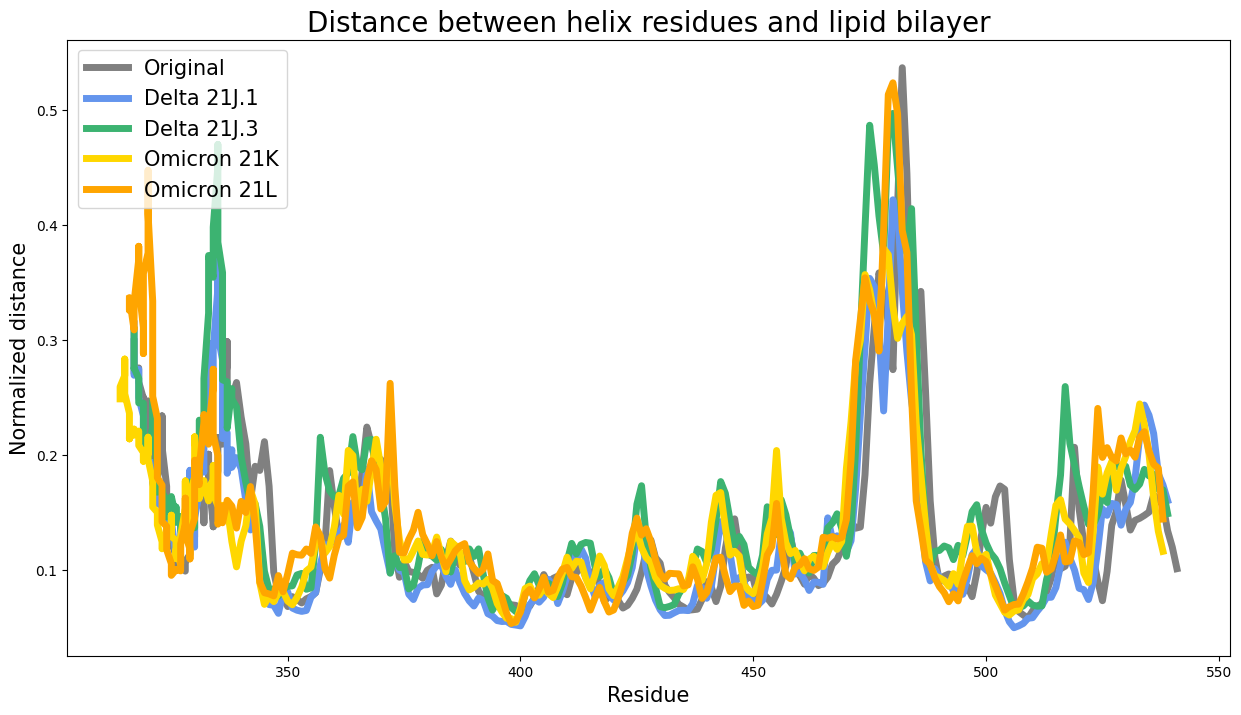

In [380]:
import matplotlib.pyplot as plt
import numpy as np

path = "/home/ahr/Desktop/spike_MD/"

# Load data from files
orig = x,y = np.loadtxt(path + "orig/CLUSTER/Cl1_xvg/rmsf_rbd_Orig_0.21m_Cluster0001.xvg", comments=["@", "#"], unpack=True)
del1 = x1,y1 = np.loadtxt(path + "delta/inicial/CLUSTER/Cl1_xvg/rmsf_rbd_inicial_0.2m_Cluster0001.xvg", comments=["@", "#"], unpack=True)
del3 = x2,y2 = np.loadtxt(path + "delta/final/CLUSTER/Cl1_xvg/rmsf_rbd_final_0.26m_Cluster0001.xvg", comments=["@", "#"], unpack=True)
omiK = x3,y3 = np.loadtxt(path + "omicron/CLUSTER/Cl1_xvg/rmsf_rbd_omicron_0.21m_Cluster0001.xvg", comments=["@", "#"], unpack=True)
omiL = x4,y4 = np.loadtxt(path + "omicron_21L/CLUSTER/Cl1_xvg/rmsf_rbd_omicron21L_0.24m_Cluster0001.xvg", comments=["@", "#"], unpack=True)

# Data needed to add markers and annotations [without overlapping mutations in plot]
adj = 274

Delta21J_1 = [452, 478]
Delta21J_1_labs = ["L452R", "T478K"]
del1_indx = 0

Delta21J_3 = [434, 452, 478]
Delta21J_3_labs = ["I434V", "L452R", "T478K"]
del3_indx = 0

omicron21K = [339, 417, 446, 478, 484]
omicron21K_labs = ["G339D", "K417N", "G446S", "T478K", "E484A"]
omiK_indx = 0

omicron21L = [339, 417, 440, 478, 484]
omicron21L_labs = ["G339D", "K417N", "N440K", "T478K", "E484A"]
omiL_indx = 0

# Create plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot original data
ax.plot(orig[0], orig[1], color="grey", linewidth=5, label="Original")

# Plot Delta 21J.1 data
ax.plot(del1[0], del1[1], color="cornflowerblue", linewidth=5, label="Delta 21J.1")

# Plot Delta 21J.3 data
ax.plot(del3[0], del3[1], color="mediumseagreen", linewidth=5, label="Delta 21J.3")

# Plot Omicron 21K data
ax.plot(omiK[0], omiK[1], color="gold", linewidth=5, label="Omicron 21K")

# Plot Omicron 21L data
ax.plot(omiL[0], omiL[1], color="orange", linewidth=5, label="Omicron 21L")

# Add legend, x-axis label, and y-axis label
ax.legend(loc="upper left", fontsize=15)
ax.set_xlabel("Residue", fontsize=15)
ax.set_ylabel("Normalized distance", fontsize=15)

# Set the title of the plot
plt.title("Distance between helix residues and lipid bilayer", fontsize=20)

# Show the plot
plt.show()

